Mid term Project

Question 3:                                                                          
The electrocardiogram (ECG) is an account of heart electrical action. The electrical action is promptly identified by cathodes joined to the skin. After the electric current is distinguished it is opens up, either shown on a screen or recorded on ECG chart paper as waves and complexes. To measure the heart's electrical action a standard ECG ordinarily one being orientated in the frontal plane of the body, and the other in the level plane.

ECG signals can be measured by the electrodes from human body in typical engagement. Signals that come from electrodes are collected by simple electrical circuits with the help of amplifiers and analogue digital converters. ECG signal is a composite from of 5 waves - P, Q, R, S and T. Many of the heart rate detection are based upon the QRS complex detection and hear rate is calculated like distance between the QRS complexes. The direct methods used for heart rate detection are ECG signal spectral analyses  and Short-Term Autocorrelation method. 


 The length of the file is: 43081 as expected from 43081 samples x 1 line

 The length of the time array is: 43081


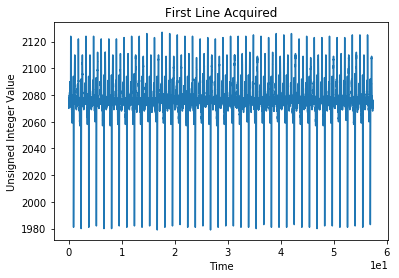

In [170]:
%matplotlib inline


#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('aami3a.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
EcgSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(EcgSignal)) + ' as expected from 43081 samples x 1 line')
#we will now populate an array for the time which we now is 1/750Hz step for a total of 40381
x=np.arange(0,43081/750.,1/750.)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (43081 samples)
plt.plot(x,EcgSignal[:43081])
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close() #close the file

5) If a person at rest has an average heart rate between 60 and 100 beats per minute, how many samples should you plot to obtain 5 beats in the signal?

Taking an average heart beat be 75.    
To obtain beats/second= 75/60 = 1.25 (beats/second)             
As there are 5 beats in the signal                
1.25*5= 6.25                                                                                
Thus the samples to be plotted for obtaing a 5 beats signal= 6.25/1.25 *1e6  = 5000.

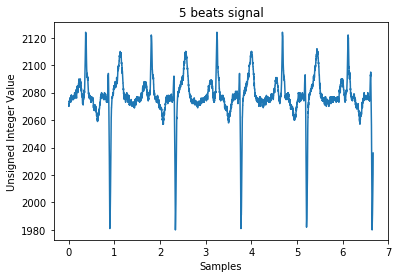

In [171]:
x=np.arange(0,5000/750.,1/750.)  #start,stop,step
#we will plot a signal with 5 beats.
plt.plot(x,EcgSignal[:5000])
plt.title('5 beats signal')
plt.xlabel('Samples')
plt.ylabel('Unsigned Integer Value')
f.close()


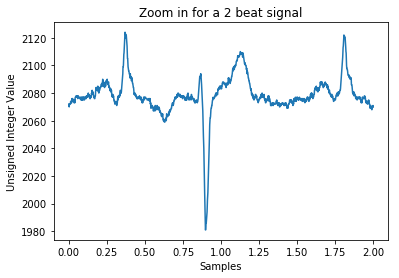

In [172]:
x=np.arange(0,1500/750.,1/750.)  #start,stop,step
plt.plot(x,EcgSignal[:1500])
plt.title('Zoom in for a 2 beat signal')
plt.xlabel('Samples')
plt.ylabel('Unsigned Integer Value')
f.close()

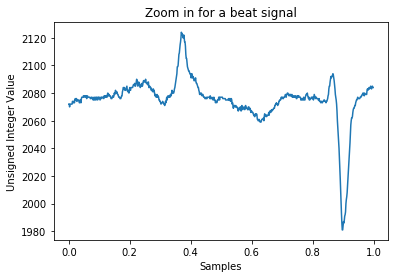

In [173]:
x=np.arange(0,750/750.,1/750.)  #start,stop,step
plt.plot(x,EcgSignal[:750])
plt.title('Zoom in for a beat signal')
plt.xlabel('Samples')
plt.ylabel('Unsigned Integer Value')
f.close()

7) The heart beat was lower for this individual because of the short QRS curve.

In [174]:
x=np.arange(22500)
t=0
y=np.amax(EcgSignal[:750])
print 'QRS peak is ' +str (y)
for index in x:
    if EcgSignal[index]>=2124:
        t=t+1
print 'Heart beats per minute is ' +str(t*2)  

QRS peak is 2124
Heart beats per minute is 44


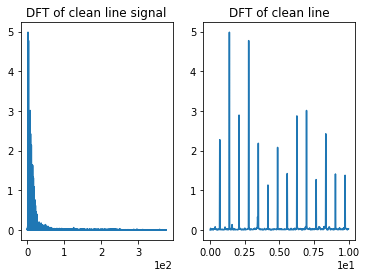

In [175]:
FirstLine=EcgSignal[:43081]
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
f=np.arange(0,750./2,750./43081)
Y=np.fft.fft(dataF)
t=abs(Y)/L
plt.subplot(121)
plt.plot(f, t[:21541])
plt.title('DFT of clean line signal')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
inx=np.where(f>1e1)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], t[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [176]:
FirstLine=EcgSignal[:43081]
dataF=FirstLine-np.mean(FirstLine)
L1=len(dataF)
print 'Peak in DFT data is ' +str(p) 

Peak in DFT data is 4.98176674504


In [177]:
y=np.arange(21540)
p=max(t)
for index in y:
    if Pyy[index]>=4.9817:
        print 'Maximum is observed at f=' +str(index/57.44)  
        break 

11) Hear rate(H) is calculated in beats per minute

Hence H= 60/f , where f is the highest frewuency 
      H= 60/1.3928  = 43.0787                                                                           
      
12) From mentioned above formula H=60/f the heart rate can be obtained through the highest frequencies.
     

13) The amplitude of the signal doesnot be effected by filtering, this can be seen through the reference 4.

Question 14,15:

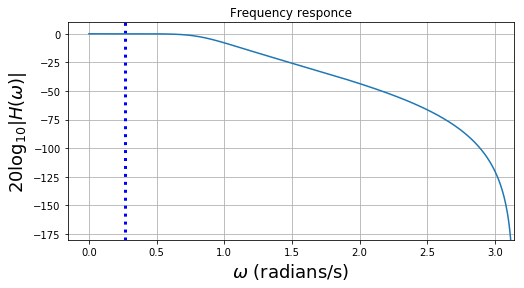

In [178]:
from scipy import signal
import numpy as np
from __future__ import division
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((20,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
fs=750
NF=fs/2
rc= 100
Wn=100/NF
X,Y=signal.butter(4,Wn,btype='low',analog= False)
w,h=signal.freqz(X,Y)
s=signal.lfilter(X,Y,dataF)
x=np.arange(0,43081/750.,1/750.)
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.set_title('Frequency responce')
ax.plot(w, 20 * np.log10(abs(h)))
ax.set_ylabel(r"$ 20 \log_{10}|H(\omega)| $",fontsize=18)
ax.set_xlabel(r'$\omega$ (radians/s)',fontsize=18)
ax.set_xlim(xmax = np.pi)
ax.set_ylim(ymin=-180,ymax=10)
ax.vlines(Wn,-180,180,linestyles=':',color='b',lw=3.)
ax.grid()


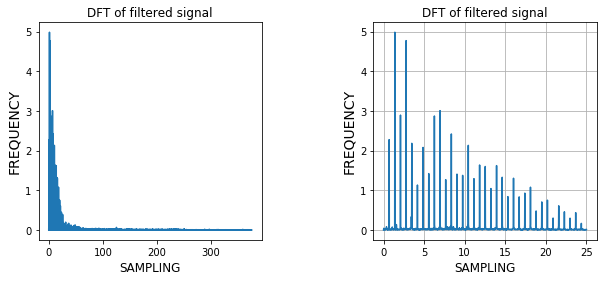

In [179]:
from matplotlib import gridspec
fig=plt.figure()
fig.set_size_inches((10,10))
gs = gridspec.GridSpec(2,2)
gs.update( wspace=0.5, hspace=0.5)
FirstLine=EcgSignal[:43080]
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
f=np.arange(0,750/2,750/43080.)
Y=np.fft.fft(dataF)
Pyy=abs(Y)/L
ax = fig.add_subplot(plt.subplot(gs[0,0]))
ax.plot(f, Pyy[:21540])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("FREQUENCY",fontsize=14)
ax.set_xlabel('SAMPLING',fontsize=12)
indx=np.where(f>25)
indx=indx[0]
ax = fig.add_subplot(plt.subplot(gs[0,1]))
ax.plot(f[:indx[0]], Pyy[:indx[0]])
ax.set_title('DFT of filtered signal')
ax.set_ylabel("FREQUENCY",fontsize=14)
ax.set_xlabel('SAMPLING',fontsize=12)

ax.grid()


17) There will not be any interpretation in the heart beat because the amplitude of the signal doesnot change.

References:

1. D. W. Mortara "Digital filters for ECG signals" <em>Comput. Cardiol. 

2.  L. G. Herrera-Benzed&á; J. Garcia B. G. Denys "Real-time digital filters for ECG signals: Evaluation and new designs" <em>Proc. Comput. Cardiol.</em> pp. 133 1991.

3.  M. Ferdjallah R. E. Barr Adaptive digital notch filter design on the unit circle for the removal of powerline noise from biomedical signals IEEE Trans.

4. LG Herrera-Bendezd, J Garcia, BG Deny "Real-Time Digital Filters for ECG Signals:
Evaluation and New Designs". 